# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information and json
def weather_check(city):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    results = requests.get(url)
    weather_json = results.json()
    try:
        id = weather_json['id']
        temp = weather_json['main']['temp']
        lat = weather_json['coord']['lat']
        lon = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        clouds = weather_json['clouds']['all']
        wind = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        print(f"Processing {city} with city number {id}")
        return id, temp
    except:
        pass

for city in cities:
    try:
        wc = weather_check(city)
        
        id = wc[0]
        temp = wc[1]
        #print(wc)
    except:
        print(f"City, {city}, not found. Skipping...")

Processing butaritari with city number 2110227
Processing saint george with city number 5546220
Processing shirokiy with city number 2016680
Processing ushuaia with city number 3833367
Processing saint-francois with city number 2980080
City, chagda, not found. Skipping...
Processing dunedin with city number 2191562
Processing tiksi with city number 2015306
Processing broome with city number 5110365
Processing busselton with city number 2075265
City, taolanaro, not found. Skipping...
Processing puerto ayora with city number 3652764
Processing mataura with city number 6201424
Processing rikitea with city number 4030556
City, barentsburg, not found. Skipping...
City, barbar, not found. Skipping...
City, belushya guba, not found. Skipping...
Processing atuona with city number 4020109
Processing port macquarie with city number 2152659
Processing mount isa with city number 2065594
Processing bluff with city number 2206939
Processing samarai with city number 2132606
Processing saint-philippe 

City, khonuu, not found. Skipping...
City, dolbeau, not found. Skipping...
Processing koumac with city number 2140558
Processing grand gaube with city number 934479
Processing dolores with city number 3435038
Processing san patricio with city number 3985168
Processing souillac with city number 933995
Processing ribeira grande with city number 3372707
Processing talnakh with city number 1490256
Processing crib point with city number 2169995
City, asayita, not found. Skipping...
Processing dunmore town with city number 3572462
Processing odoyev with city number 516197
Processing rodez with city number 2983153
Processing khandyga with city number 2022773
Processing port said with city number 358619
Processing clarksburg with city number 4802316
Processing jalu with city number 86049
Processing arraial do cabo with city number 3471451
Processing pontianak with city number 1630789
City, grand river south east, not found. Skipping...
Processing salinas with city number 5391295
Processing te 

Processing myszkow with city number 3091217
Processing coahuayana with city number 4013679
Processing vila franca do campo with city number 3372472
Processing shiyan with city number 1794903
Processing san quintin with city number 3984997
Processing gigante with city number 3682047
Processing puerto del rosario with city number 2512186
Processing pimentel with city number 3693584
City, lolua, not found. Skipping...
Processing saldanha with city number 3361934
Processing beatrice with city number 5063646
City, sedelnikovo, not found. Skipping...
Processing lebu with city number 3883457
Processing muros with city number 3115824
Processing mubarakpur with city number 1262678
Processing pachino with city number 6539213
Processing papara with city number 3395473
Processing joniskis with city number 598796
City, aflu, not found. Skipping...
Processing pevek with city number 2122090
Processing chuy with city number 3443061
Processing cabo san lucas with city number 3985710
Processing lavrenti

Processing kuala terengganu with city number 1734705
Processing the valley with city number 3573374
Processing maningrida with city number 2067089
Processing la ronge with city number 6050066
Processing gambela with city number 337405
Processing jumla with city number 1283285
Processing krutinka with city number 1501690
Processing japura with city number 1642773
Processing kudahuvadhoo with city number 1337607
Processing comodoro rivadavia with city number 3860443
Processing wonthaggi with city number 2154826
Processing muzhi with city number 1498161
Processing dossor with city number 610023
Processing londrina with city number 3458449
City, ondorhaan, not found. Skipping...
Processing bandiagara with city number 2460489
Processing puqi with city number 1798473
Processing sao felix do xingu with city number 3388847
Processing mwense with city number 902721
Processing sungaipenuh with city number 1625929
Processing tayoltita with city number 3982292
Processing langxiang with city number

In [4]:
# Lists to hold data
city_list = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

#Loop through weather data
def weather_check(city):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    results = requests.get(url)
    weather_json = results.json()
    try:
        #print(f"wc city is: {city}")
        #print(f"lat is: {lat}")
        #city_list.append({city})
        city_list.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        #print(f"Processing {city} with city number {id}")
        return lon
    except:
        pass
#cities = 'Paris','Minneapolis','Chicago'
for city in cities:
    try:
        wc = weather_check(city)
        #lat = wc[0]
        #print(wc)
    except:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame
weather_dict = {
    'City': city_list,
    'Lat': lat,
    'Lon': lon,
    'Max_Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind_Speed': wind, 
    'Country': country,
    'Date': date
    
}
city_weather_data_df = pd.DataFrame(weather_dict)
city_weather_data_df


,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Butaritari,3.07,172.79,83.07,67,51,3.74,KI,1595290005
1,Saint George,37.10,-113.58,105.80,10,1,20.80,US,1595289969
2,Shirokiy,49.76,129.52,67.68,79,14,7.27,RU,1595290021
3,Ushuaia,-54.80,-68.30,28.40,92,2,4.70,AR,1595289995
4,Saint-François,46.42,3.91,73.00,68,37,4.70,FR,1595290008
...,...,...,...,...,...,...,...,...,...
553,Włoszczowa,50.85,19.97,61.00,1,62,7.00,PL,1595290107
554,Port Keats,-14.25,129.55,72.72,37,89,10.00,AU,1595290010
555,Proddatūr,14.73,78.55,82.36,69,100,10.58,IN,1595290107
556,Kentville,45.08,-64.50,80.60,69,20,14.99,CA,1595289936


In [6]:
#Output to CSV
city_weather_data_df.to_csv('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/city_data.csv')
    

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_weather_data_df

,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Butaritari,3.07,172.79,83.07,67,51,3.74,KI,1595290005
1,Saint George,37.10,-113.58,105.80,10,1,20.80,US,1595289969
2,Shirokiy,49.76,129.52,67.68,79,14,7.27,RU,1595290021
3,Ushuaia,-54.80,-68.30,28.40,92,2,4.70,AR,1595289995
4,Saint-François,46.42,3.91,73.00,68,37,4.70,FR,1595290008
...,...,...,...,...,...,...,...,...,...
553,Włoszczowa,50.85,19.97,61.00,1,62,7.00,PL,1595290107
554,Port Keats,-14.25,129.55,72.72,37,89,10.00,AU,1595290010
555,Proddatūr,14.73,78.55,82.36,69,100,10.58,IN,1595290107
556,Kentville,45.08,-64.50,80.60,69,20,14.99,CA,1595289936


In [9]:
#  Get the indices of cities that have humidity over 100%.
find_humidity_outliers = city_weather_data_df[city_weather_data_df['Humidity'] == 100 ].index
#find_humidity_outliers

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data_df = city_weather_data_df.drop(find_humidity_outliers , inplace=False)
cleaned_city_data_df

,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Butaritari,3.07,172.79,83.07,67,51,3.74,KI,1595290005
1,Saint George,37.10,-113.58,105.80,10,1,20.80,US,1595289969
2,Shirokiy,49.76,129.52,67.68,79,14,7.27,RU,1595290021
3,Ushuaia,-54.80,-68.30,28.40,92,2,4.70,AR,1595289995
4,Saint-François,46.42,3.91,73.00,68,37,4.70,FR,1595290008
...,...,...,...,...,...,...,...,...,...
553,Włoszczowa,50.85,19.97,61.00,1,62,7.00,PL,1595290107
554,Port Keats,-14.25,129.55,72.72,37,89,10.00,AU,1595290010
555,Proddatūr,14.73,78.55,82.36,69,100,10.58,IN,1595290107
556,Kentville,45.08,-64.50,80.60,69,20,14.99,CA,1595289936


In [20]:
# Extract relevant fields from the data frame
cols = [0,1,3,4,5,6]
relevant_city_data_df = cleaned_city_data_df[cleaned_city_data_df.columns[cols]]
relevant_city_data_df 

# Export the City_Data into a csv
relevantcity_output_data_file = "output_data/cities.csv"

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


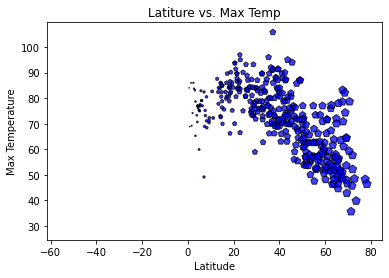

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Max_Temp"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Latiture vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

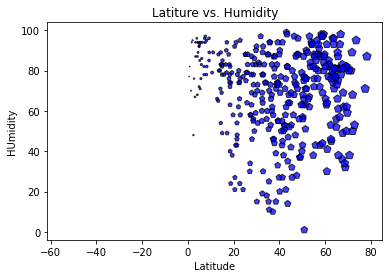

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Humidity"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Latiture vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

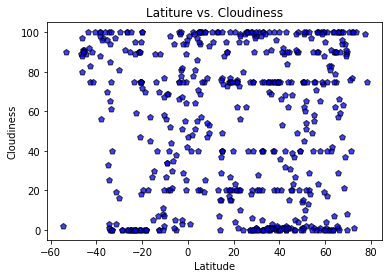

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latiture vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

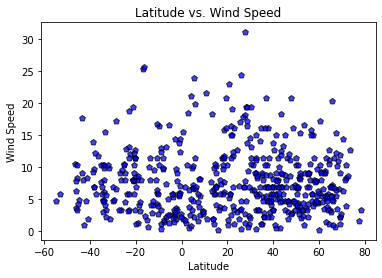

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Wind_Speed"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression